In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("C:\\PythonProjects\\PBL2\\cicids2017_cleaned.csv")

In [3]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,...,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Max,Active Min,Idle Mean,Idle Max,Idle Min,Attack Type
0,22,1266342,41,2664,456,0,64.975610,109.864573,976,0,...,243,24,32,0.0,0,0,0.0,0,0,Normal Traffic
1,22,1319353,41,2664,456,0,64.975610,109.864573,976,0,...,243,24,32,0.0,0,0,0.0,0,0,Normal Traffic
2,22,160,1,0,0,0,0.000000,0.000000,0,0,...,243,0,32,0.0,0,0,0.0,0,0,Normal Traffic
3,22,1303488,41,2728,456,0,66.536585,110.129945,976,0,...,243,24,32,0.0,0,0,0.0,0,0,Normal Traffic
4,35396,77,1,0,0,0,0.000000,0.000000,0,0,...,290,0,32,0.0,0,0,0.0,0,0,Normal Traffic


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520751 entries, 0 to 2520750
Data columns (total 53 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Length of Fwd Packets  int64  
 4   Fwd Packet Length Max        int64  
 5   Fwd Packet Length Min        int64  
 6   Fwd Packet Length Mean       float64
 7   Fwd Packet Length Std        float64
 8   Bwd Packet Length Max        int64  
 9   Bwd Packet Length Min        int64  
 10  Bwd Packet Length Mean       float64
 11  Bwd Packet Length Std        float64
 12  Flow Bytes/s                 float64
 13  Flow Packets/s               float64
 14  Flow IAT Mean                float64
 15  Flow IAT Std                 float64
 16  Flow IAT Max                 int64  
 17  Flow IAT Min                 int64  
 18  Fwd IAT Total                int64  
 19  

Attack Type
Normal Traffic    2095057
DoS                193745
DDoS               128014
Port Scanning       90694
Brute Force          9150
Web Attacks          2143
Bots                 1948
Name: count, dtype: int64


C:\Users\ishaa\AppData\Local\Temp\ipykernel_8272\956607838.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')


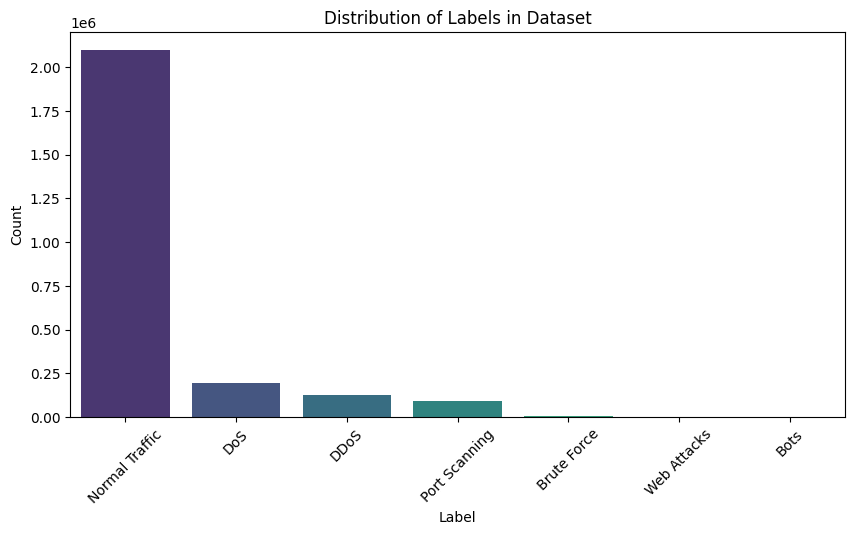

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count unique labels
label_counts = df['Attack Type'].value_counts()

print(label_counts)

# Plot the distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Distribution of Labels in Dataset")
plt.xticks(rotation=45)  # Rotate labels for better visibility if needed
plt.show()

In [6]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
import pandas as pd

# Assuming df is your original dataframe
X = df.drop(columns=['Attack Type'], axis=1)
y = df['Attack Type']

# Step 1: Reduce Normal Traffic (undersample to 1,000,000)
undersample = RandomUnderSampler(sampling_strategy={'Normal Traffic': 1000000})  
X_under, y_under = undersample.fit_resample(X, y)

# Step 2: Oversample attack types using SMOTE
smote = SMOTE(sampling_strategy='auto')

X_resampled, y_resampled = smote.fit_resample(X_under, y_under)

# Check new distribution
print(y_resampled.value_counts())

Attack Type
Bots              1000000
Brute Force       1000000
DDoS              1000000
DoS               1000000
Normal Traffic    1000000
Port Scanning     1000000
Web Attacks       1000000
Name: count, dtype: int64


In [7]:
# Combine features and labels into a single DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)  # Convert X_resampled back to DataFrame
df_resampled['Attack Type'] = y_resampled  # Add labels column

# Save to CSV
df_resampled.to_csv('NIDS_smote.csv', index=False)

print("Dataset saved as NIDS_smote.csv successfully!")


Dataset saved as NIDS_smote.csv successfully!


Attack Type
Bots              1000000
Brute Force       1000000
DDoS              1000000
DoS               1000000
Normal Traffic    1000000
Port Scanning     1000000
Web Attacks       1000000
Name: count, dtype: int64


C:\Users\ishaa\AppData\Local\Temp\ipykernel_8272\2898736296.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')


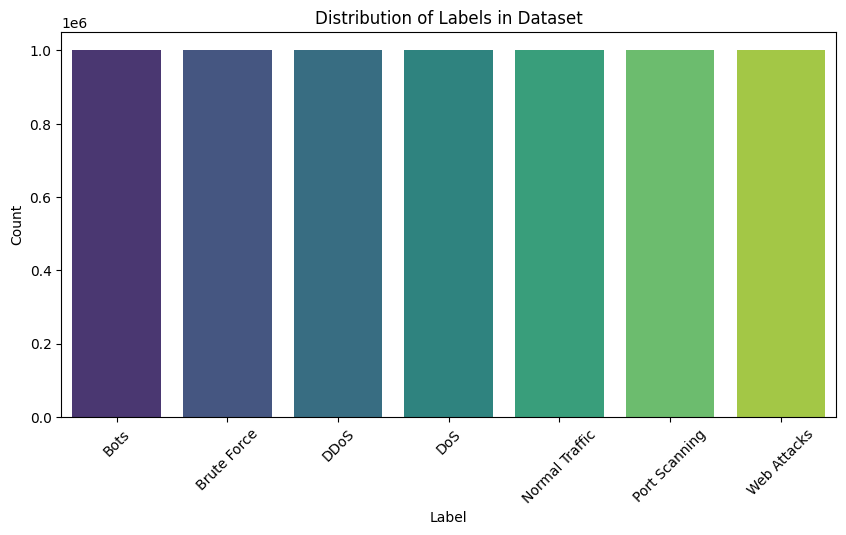

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count unique labels
label_counts = df_resampled['Attack Type'].value_counts()

print(label_counts)

# Plot the distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Distribution of Labels in Dataset")
plt.xticks(rotation=45)  # Rotate labels for better visibility if needed
plt.show()

In [9]:
import gc

del df

gc.collect()

203

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, SeparableConv1D, MaxPooling1D, BatchNormalization, Flatten
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout, GaussianNoise
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

# Separate features and labels
X = df_resampled.drop(columns=['Attack Type']).values  
y = df_resampled['Attack Type'].values  

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# ✅ Add Stronger Noise to Prevent Memorization
X += np.random.normal(0, 0.1, X.shape)  

# Reshape input for CNN
X = np.expand_dims(X, axis=2)  # Shape -> (samples, features, 1)

# Split into Train & Validation Sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

# ✅ Optimized CNN + BiLSTM Model (Fast & Regularized)
model = Sequential([
    # ✅ Strong Gaussian Noise (Breaks Overfitting)
    GaussianNoise(0.1, input_shape=(X.shape[1], 1)),

    # ✅ Faster CNN Feature Extractor
    SeparableConv1D(filters=32, kernel_size=3, activation='relu', padding='same', strides=2, kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2, strides=2),

    #Dropout(0.2),

    SeparableConv1D(filters=64, kernel_size=3, activation='relu', padding='same', strides=2, kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2, strides=2),

    # ✅ Smaller BiLSTM (Less Memorization, Faster)
    Bidirectional(LSTM(16, return_sequences=False, kernel_regularizer=l2(1e-4))),  
    Dropout(0.5),  # ✅ Stronger Dropout

    # ✅ Dense Layers with Regularization
    Dense(64, activation='relu', kernel_regularizer=l2(1e-4)),
    Dropout(0.5),  # ✅ Stronger Dropout

    # ✅ Output Layer
    Dense(len(np.unique(y)), activation='softmax')
])

# ✅ Compile with Faster Adam Optimizer
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# ✅ Early Stopping to Prevent Overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# ✅ Train Model Fast with Smaller Batch Size
history = model.fit(
    X_train, y_train, 
    epochs=10, batch_size=64,  # ✅ Smaller batch size for better generalization
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],  
    verbose=1
)

# ✅ Evaluate on Validation Set
y_val_pred = np.argmax(model.predict(X_val), axis=1)
val_acc = accuracy_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred, average='weighted')

# Print Results
print(f'Validation Accuracy: {val_acc:.4f}')
print(f'Validation F1 Score: {val_f1:.4f}')


Epoch 1/10
98438/98438 [==============================] - 925s 9ms/step - loss: 0.3108 - accuracy: 0.9063 - val_loss: 0.1874 - val_accuracy: 0.9439
Epoch 2/10
98438/98438 [==============================] - 920s 9ms/step - loss: 0.2697 - accuracy: 0.9187 - val_loss: 0.1933 - val_accuracy: 0.9388
Epoch 3/10
98438/98438 [==============================] - 913s 9ms/step - loss: 0.2613 - accuracy: 0.9215 - val_loss: 0.1751 - val_accuracy: 0.9471
Epoch 4/10
98438/98438 [==============================] - 908s 9ms/step - loss: 0.2580 - accuracy: 0.9225 - val_loss: 0.1738 - val_accuracy: 0.9470
Epoch 5/10
98438/98438 [==============================] - 929s 9ms/step - loss: 0.2556 - accuracy: 0.9232 - val_loss: 0.1795 - val_accuracy: 0.9448
Epoch 6/10
98438/98438 [==============================] - 934s 9ms/step - loss: 0.2543 - accuracy: 0.9236 - val_loss: 0.1884 - val_accuracy: 0.9422
Epoch 7/10
98438/98438 [==============================] - 939s 10ms/step - loss: 0.2530 - accuracy: 0.9241 - val

In [14]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score

# Load Original Dataset (No SMOTE)
df = pd.read_csv("C:\\PythonProjects\\PBL2\\cicids2017_cleaned.csv")

# ✅ Encode Labels using the same LabelEncoder
y_true = label_encoder.transform(df['Attack Type'])

# ✅ Normalize Features using the same StandardScaler
X_test = scaler.transform(df.drop(columns=['Attack Type']).values)

# ✅ Reshape Input for CNN
X_test = np.expand_dims(X_test, axis=2)

# ✅ Make Predictions
y_pred = np.argmax(model.predict(X_test), axis=1)

# ✅ Evaluate Performance
val_acc = accuracy_score(y_true, y_pred)
val_f1 = f1_score(y_true, y_pred, average='weighted')

# ✅ Print Results
print(f'Validation Accuracy: {val_acc:.4f}')
print(f'Validation F1 Score: {val_f1:.4f}')


78774/78774 [==============================] - 230s 3ms/step
Validation Accuracy: 0.8769
Validation F1 Score: 0.9132
